In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import warnings
warnings.simplefilter('ignore')

## Bikes

In [34]:
trip = Table.read_table('trip.csv')
trip

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069
913452,293,8/31/2015 23:07,Yerba Buena Center of the Arts (3rd @ Howard),68,8/31/2015 23:12,San Francisco Caltrain (Townsend at 4th),70,538,Subscriber,94118
913451,896,8/31/2015 23:07,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,363,Customer,92562
913450,255,8/31/2015 22:16,Embarcadero at Sansome,60,8/31/2015 22:20,Steuart at Market,74,470,Subscriber,94111
913449,126,8/31/2015 22:12,Beale at Market,56,8/31/2015 22:15,Temporary Transbay Terminal (Howard at Beale),55,439,Subscriber,94130
913448,932,8/31/2015 21:57,Post at Kearny,47,8/31/2015 22:12,South Van Ness at Market,66,472,Subscriber,94702


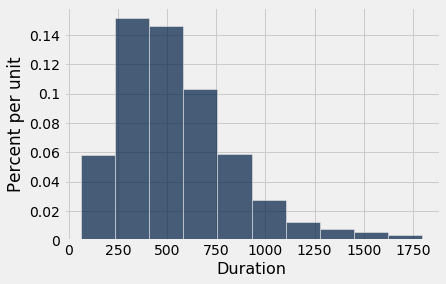

In [3]:
commute = trip.where('Duration', are.below(1800))
commute.hist('Duration')

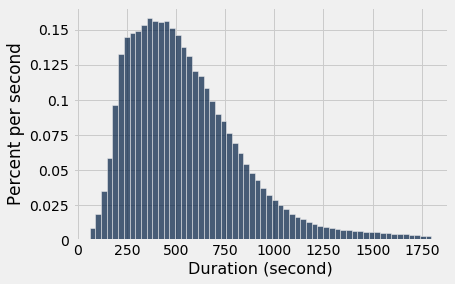

In [4]:
commute.hist('Duration', bins=60, unit='second')

In [7]:
# Percent of people who have a ride duration between 500 and 250 seconds
(500-250) * 0.15 

37.5

In [9]:
starts = commute.group('Start Station').sort('count', descending=True)
starts

Start Station,count
San Francisco Caltrain (Townsend at 4th),25858
San Francisco Caltrain 2 (330 Townsend),21523
Harry Bridges Plaza (Ferry Building),15543
Temporary Transbay Terminal (Howard at Beale),14298
2nd at Townsend,13674
Townsend at 7th,13579
Steuart at Market,13215
Embarcadero at Sansome,12842
Market at 10th,11523
Market at Sansome,11023


In [10]:
commute.pivot('Start Station', 'End Station')

End Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,Castro Street and El Camino Real,Civic Center BART (7th at Market),Clay at Battery,Commercial at Montgomery,Cowper at University,Davis at Jackson,Embarcadero at Bryant,Embarcadero at Folsom,Embarcadero at Sansome,Embarcadero at Vallejo,Evelyn Park and Ride,Franklin at Maple,Golden Gate at Polk,Grant Avenue at Columbus Avenue,Harry Bridges Plaza (Ferry Building),Howard at 2nd,Japantown,MLK Library,Market at 10th,Market at 4th,Market at Sansome,Mechanics Plaza (Market at Battery),Mezes Park,Mountain View Caltrain Station,Mountain View City Hall,Palo Alto Caltrain Station,Park at Olive,Paseo de San Antonio,Post at Kearny,Powell Street BART,Powell at Post (Union Square),Redwood City Caltrain Station,Redwood City Medical Center,Redwood City Public Library,Rengstorff Avenue / California Street,Ryland Park,SJSU - San Salvador at 9th,SJSU 4th at San Carlos,San Antonio Caltrain Station,San Antonio Shopping Center,San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),San Francisco City Hall,San Jose City Hall,San Jose Civic Center,San Jose Diridon Caltrain Station,San Mateo County Center,San Pedro Square,San Salvador at 1st,Santa Clara County Civic Center,Santa Clara at Almaden,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
2nd at Folsom,54,190,554,107,0,0,40,21,0,0,44,78,54,0,9,77,32,41,14,0,0,11,30,416,53,0,0,169,114,302,33,0,0,0,0,0,0,60,121,88,0,0,0,0,0,0,0,0,0,694,445,21,0,0,0,0,0,0,0,0,38,57,0,0,39,237,342,0,17,31
2nd at South Park,295,164,71,180,0,0,208,85,0,0,112,87,160,0,37,56,178,83,116,0,0,57,73,574,500,0,0,139,199,1633,119,0,0,0,0,0,0,299,84,113,0,0,0,0,0,0,0,0,0,559,480,48,0,0,0,0,0,0,0,0,66,152,0,0,374,429,143,0,63,209
2nd at Townsend,437,151,185,92,0,0,608,350,0,0,80,329,168,0,386,361,658,506,254,0,0,27,315,2607,295,0,0,110,225,845,177,0,0,0,0,0,0,120,100,141,0,0,0,0,0,0,0,0,0,905,299,14,0,0,0,0,0,0,0,0,72,508,0,0,2349,784,417,0,57,166
5th at Howard,113,177,148,83,0,0,59,130,0,0,203,76,129,0,30,57,49,166,54,0,0,85,78,371,478,0,0,303,158,168,90,0,0,0,0,0,0,93,183,169,0,0,0,0,0,0,0,0,0,690,1859,48,0,0,0,0,0,0,0,0,116,102,0,0,182,750,200,0,43,267
Adobe on Almaden,0,0,0,0,11,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,7,0,0,0,0,0,0,0,0,0,25,0,0,0,0,0,0,0,7,7,16,0,0,0,0,0,19,23,265,0,20,4,5,10,0,0,14,0,0,0,0,0,0,0
Arena Green / SAP Center,0,0,0,0,7,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,5,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,24,3,7,0,0,0,0,0,6,20,7,0,56,12,38,259,0,0,13,0,0,0,0,0,0,0
Beale at Market,127,79,183,59,0,0,59,661,0,0,201,75,101,0,247,178,38,590,165,0,0,54,435,57,72,0,0,286,236,163,26,0,0,0,0,0,0,49,227,179,0,0,0,0,0,0,0,0,0,640,269,25,0,0,0,0,0,0,0,0,243,128,0,0,16,167,35,0,64,45
Broadway St at Battery St,67,89,279,119,0,0,1022,110,0,0,62,283,226,0,191,198,79,231,35,0,0,5,70,168,49,0,0,32,97,341,214,0,0,0,0,0,0,169,71,218,0,0,0,0,0,0,0,0,0,685,438,7,0,0,0,0,0,0,0,0,18,106,0,0,344,748,50,0,79,47
California Ave Caltrain Station,0,0,0,0,0,0,0,0,38,1,0,0,0,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,192,40,0,0,0,0,0,0,0,6,0,0,0,17,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,0,0
Castro Street and El Camino Real,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,931,34,0,0,0,0,0,0,0,0,0,7,0,0,0,4,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
duration = trip.select('Start Station', 'End Station', 'Duration')
duration

Start Station,End Station,Duration
Harry Bridges Plaza (Ferry Building),San Francisco Caltrain (Townsend at 4th),765
San Antonio Shopping Center,Mountain View City Hall,1036
Post at Kearny,2nd at South Park,307
San Jose City Hall,San Salvador at 1st,409
Embarcadero at Folsom,Embarcadero at Sansome,789
Yerba Buena Center of the Arts (3rd @ Howard),San Francisco Caltrain (Townsend at 4th),293
Embarcadero at Folsom,Embarcadero at Sansome,896
Embarcadero at Sansome,Steuart at Market,255
Beale at Market,Temporary Transbay Terminal (Howard at Beale),126
Post at Kearny,South Van Ness at Market,932


In [53]:
shortest = duration.group(['Start Station', 'End Station'], min).relabeled('Duration min', 'Minimum Duration')
shortest

Start Station,End Station,Minimum Duration
2nd at Folsom,2nd at Folsom,61
2nd at Folsom,2nd at South Park,61
2nd at Folsom,2nd at Townsend,137
2nd at Folsom,5th at Howard,215
2nd at Folsom,Beale at Market,219
2nd at Folsom,Broadway St at Battery St,351
2nd at Folsom,Civic Center BART (7th at Market),456
2nd at Folsom,Clay at Battery,272
2nd at Folsom,Commercial at Montgomery,275
2nd at Folsom,Davis at Jackson,396


In [55]:
from_cc = shortest.where('Start Station', are.containing('Civic Center BART')).sort('Minimum Duration')
from_cc

Start Station,End Station,Minimum Duration
Civic Center BART (7th at Market),Civic Center BART (7th at Market),60
Civic Center BART (7th at Market),Powell Street BART,97
Civic Center BART (7th at Market),Market at 10th,104
Civic Center BART (7th at Market),Golden Gate at Polk,141
Civic Center BART (7th at Market),San Francisco City Hall,151
Civic Center BART (7th at Market),Market at 4th,164
Civic Center BART (7th at Market),5th at Howard,179
Civic Center BART (7th at Market),South Van Ness at Market,199
Civic Center BART (7th at Market),Market at Sansome,254
Civic Center BART (7th at Market),Powell at Post (Union Square),254


## Maps

In [14]:
stations = Table.read_table('station.csv')
stations

station_id,name,lat,long,dockcount,landmark,installation
2,San Jose Diridon Caltrain Station,37.3297,-121.902,27,San Jose,8/6/2013
3,San Jose Civic Center,37.3307,-121.889,15,San Jose,8/5/2013
4,Santa Clara at Almaden,37.334,-121.895,11,San Jose,8/6/2013
5,Adobe on Almaden,37.3314,-121.893,19,San Jose,8/5/2013
6,San Pedro Square,37.3367,-121.894,15,San Jose,8/7/2013
7,Paseo de San Antonio,37.3338,-121.887,15,San Jose,8/7/2013
8,San Salvador at 1st,37.3302,-121.886,15,San Jose,8/5/2013
9,Japantown,37.3487,-121.895,15,San Jose,8/5/2013
10,San Jose City Hall,37.3374,-121.887,15,San Jose,8/6/2013
11,MLK Library,37.3359,-121.886,19,San Jose,8/6/2013


In [56]:
Marker.map_table(stations.select('lat', 'long', 'name'))

In [57]:
sf = stations.where('landmark', 'San Francisco')
Circle.map_table(sf.select('lat', 'long', 'name'), color='green', radius=15)

## Spring 2016 Midterm, Question 2(b)

Challenge yourself and try to solve these on your own before looking at the solutions!

In [36]:
trip = trip.select('Start Station', 'End Station', 'Duration').relabeled(0, 'Start').relabeled(1, 'End')
trip.show(3)

Start,End,Duration
Harry Bridges Plaza (Ferry Building),San Francisco Caltrain (Townsend at 4th),765
San Antonio Shopping Center,Mountain View City Hall,1036
Post at Kearny,2nd at South Park,307


### Write a Python expression below each of the following descriptions that computes its value. You may use up to two lines and introduce variables.

In [ ]:
# The name of the station where the most rentals ended (assume no ties).

In [ ]:
# The number of stations for which the average duration ending at that station was more than 10 minutes.

In [ ]:
# The number of stations that have more than 500 starts AND more than 500 ends

In [20]:
# The name of the station where the most rentals ended (assume no ties).
# First, find end counts
# Then, find the station with the highest end count
trip.group('End').sort('count', descending=True).column(0).item(0)

'San Francisco Caltrain (Townsend at 4th)'

In [21]:
# The number of stations for which the average duration ending at that station was more than 10 minutes.

# First, find the average end time for each station
# Then, keep the ones above 10 minutes
# Then, count them
trip.group('End', np.average).where(2, are.above(10*60)).num_rows

68

In [42]:
# The number of stations that have more than 500 starts AND more than 500 ends.

# First, group the trip on starts and ends, separately
# Then, join the two grouped tables
# Then, count the number of rows where the stations' start and end counts are bove 500
start_counts, end_counts = trip.group('Start').relabeled('count', 'Start Count'), trip.group('End').relabeled('count', 'End Count')
start_counts.join('Start', end_counts, 'End').where(
    'Start Count', are.above(500)).where('End Count', are.above(500)).num_rows

56

## Advanced Where

In [43]:
3 > 2

True

In [44]:
1 > 2

False

In [45]:
np.arange(5) > 2

array([False, False, False,  True,  True])

In [46]:
commute.show(3)

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107


In [47]:
# Commutes that were just in time to still be counted as free (i.e. less than 30 minutes)
just_in_time = commute.column('Duration') == 29 * 60 + 59
just_in_time

array([False, False, False, ..., False, False, False])

In [48]:
sum(just_in_time)

12

In [49]:
commute.where(just_in_time)

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
906284,1799,8/26/2015 12:49,2nd at South Park,64,8/26/2015 13:19,Steuart at Market,74,500,Subscriber,94553
885583,1799,8/11/2015 18:36,Yerba Buena Center of the Arts (3rd @ Howard),68,8/11/2015 19:06,Yerba Buena Center of the Arts (3rd @ Howard),68,390,Customer,nil
880542,1799,8/7/2015 15:37,Beale at Market,56,8/7/2015 16:07,Post at Kearny,47,552,Customer,nil
876863,1799,8/5/2015 12:08,Steuart at Market,74,8/5/2015 12:38,Embarcadero at Vallejo,48,549,Customer,94704
852744,1799,7/19/2015 15:24,Davis at Jackson,42,7/19/2015 15:54,Harry Bridges Plaza (Ferry Building),50,344,Customer,94107
785035,1799,5/28/2015 18:02,Market at 4th,76,5/28/2015 18:32,Market at 4th,76,569,Customer,81
767213,1799,5/14/2015 15:41,Grant Avenue at Columbus Avenue,73,5/14/2015 16:11,Grant Avenue at Columbus Avenue,73,366,Customer,11201
699407,1799,3/26/2015 16:20,Grant Avenue at Columbus Avenue,73,3/26/2015 16:50,Howard at 2nd,63,111,Customer,98040
620320,1799,1/27/2015 12:52,Embarcadero at Sansome,60,1/27/2015 13:22,Harry Bridges Plaza (Ferry Building),50,330,Customer,34996
585501,1799,12/25/2014 10:46,Washington at Kearny,46,12/25/2014 11:16,Embarcadero at Sansome,60,470,Customer,97331


In [50]:
# The average duration of all trips
np.average(commute.column('Duration'))

550.001433456581

In [51]:
# The average duration of trips that started and ended at the same station
same = commute.column('Start Station') == commute.column('End Station')
np.average(commute.where(same).column('Duration'))

758.612993783838

In [52]:
# The average duration of trips that started and ended at different stations
same = commute.column('Start Station') != commute.column('End Station')
np.average(commute.where(same).column('Duration'))

546.880608118648